# 3 - Data Analysis

In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm_notebook,tnrange,tqdm_pandas,tqdm
tqdm.pandas()

import os
import cPickle as pickle

import datetime as dt

import ipywidgets as widgets


import jupyternotify
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
#notify if cell is finished for cells taking longer than 30 seconds
%autonotify -a 30

<IPython.core.display.Javascript object>

In [2]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
full_column_width = 1400
out_set = 2040
screen_width = 2500

medium_image_size = screen_width

aspect_ratio = 9/16
my_dpi = 96

width = medium_image_size / my_dpi
height = width * aspect_ratio
size = (width, height)


if medium_image_size == full_column_width:
    small_text = 14
    medium_text = 16
    big_text = 260
elif medium_image_size == out_set:
    small_text = 16
    medium_text = 18
    big_text = 30
elif medium_image_size == screen_width:
    small_text = 14
    medium_text = 16
    big_text = 26
else:
    small_text = 14
    medium_text = 16
    big_text = 26
    

    
plt.style.use("ggplot")
plt.figure(figsize=size, dpi=my_dpi)
# plt.rcParams['font.family'] = 'Charter'
# plt.rcParams['font.serif'] = 'Charter'
plt.rcParams['font.monospace'] = 'Menlo'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = medium_text
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = small_text
plt.rcParams['ytick.labelsize'] = small_text
plt.rcParams['legend.fontsize'] = medium_text
plt.rcParams['figure.titlesize'] = big_text


<IPython.core.display.Javascript object>

## Load the Data

In [3]:
pickle_full = "Data Files/sorted_stays.p"

In [4]:
if os.path.isfile(pickle_full):
    print("loading pickle")
    sorted_stays = pd.read_pickle(pickle_full)
   
else:
    print("Did you run 2 - Algorithm Design?")

loading pickle


In [5]:
left_stays = sorted_stays[sorted_stays["Position"] == "left"]
middle_stays = sorted_stays[sorted_stays["Position"] == "middle"]
right_stays = sorted_stays[sorted_stays["Position"] == "right"]
sorted_stays.sample(5)

,in,out,in_index,out_index,length,Position
2408,2017-11-25 09:43:57,2017-11-25 09:44:15,1294785,1294945,00:00:18,left
1623,2017-11-24 09:31:46,2017-11-24 09:32:16,525160,525420,00:00:30,right
2704,2017-11-27 08:44:21,2017-11-27 08:44:57,2789181,2789503,00:00:36,left
3149,2017-11-27 12:43:17,2017-11-27 12:43:45,2915813,2916066,00:00:28,left
2076,2017-11-24 16:05:19,2017-11-24 16:05:45,733723,733956,00:00:26,right


### Plot the number of stays per urinal 

<IPython.core.display.Javascript object>


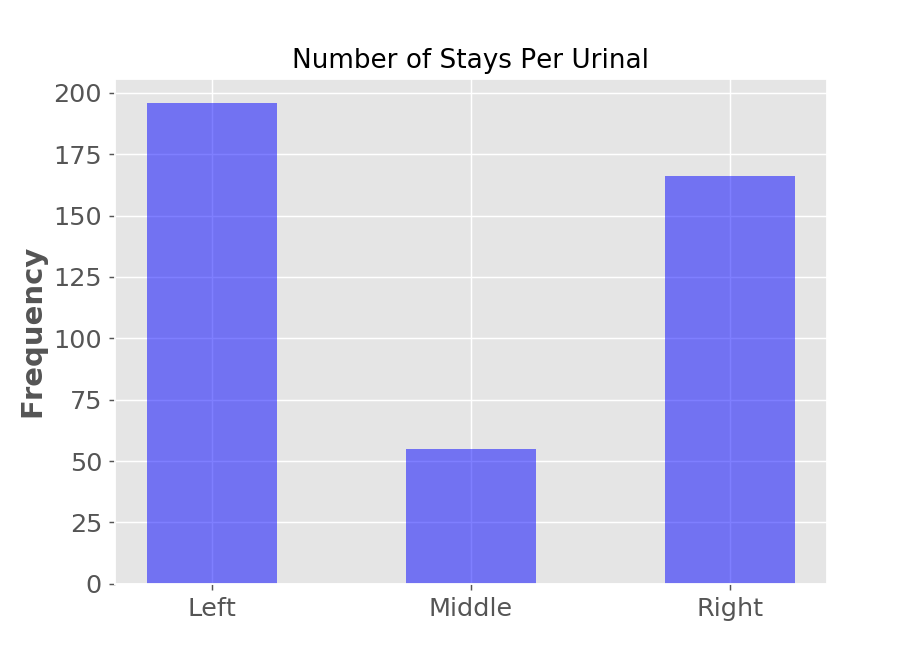

In [6]:
plt.rcParams['figure.figsize'] = (7,5)
# plt.rc('xtick', labelsize=10)
# plt.rc('ytick', labelsize=10)
# plt.rcParams['patch.edgecolor'] = 'black'
N = 3
transp = 0.5
num_stays = [len(left_stays),len(middle_stays),len(right_stays)]

ind = np.arange(N)  # the x locations for the groups
width = 0.5       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, num_stays, width,alpha=transp, color='blue')

ax.set_ylabel('Frequency')#,fontsize=15)
ax.set_title('Number of Stays Per Urinal')#,fontsize=15)
ax.set_xticks(ind)
ax.set_xticklabels(('Left', 'Middle', 'Right'))

plt.show()
fig.savefig('Images/Num_stays_per_urinal.png')

<IPython.core.display.Javascript object>


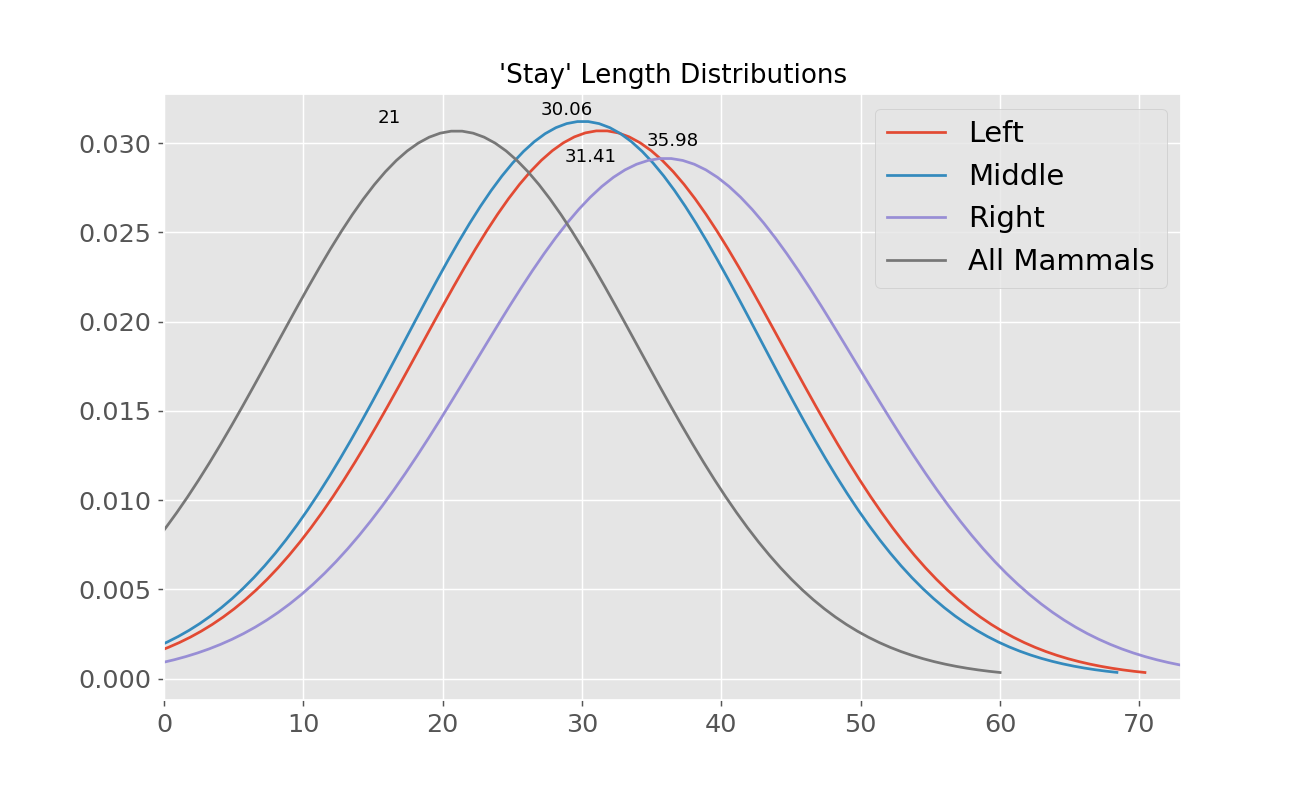

In [7]:
import matplotlib.mlab as mlab
plt.rcParams['figure.figsize'] = (10,6)

left_stay_mean = left_stays['length'].astype('timedelta64[s]').mean()
left_stay_std = left_stays['length'].astype('timedelta64[s]').std()

from datetime import timedelta
middle_stays = middle_stays[middle_stays["length"] < timedelta(seconds=80)]
middle_stay_mean = middle_stays['length'].astype('timedelta64[s]').mean()
middle_stay_std = middle_stays['length'].astype('timedelta64[s]').std()

right_stay_mean = right_stays['length'].astype('timedelta64[s]').mean()
right_stay_std = right_stays['length'].astype('timedelta64[s]').std()

stay_stats = [{"Position":"Left", "mean":left_stay_mean, "STD":left_stay_std},
{"Position":"Middle","mean":middle_stay_mean, "STD":middle_stay_std},
{"Position":"Right", "mean":right_stay_mean, "STD":right_stay_std },
{"Position":"All Mammals", "mean":21, "STD":13 },]
fig, ax = plt.subplots()
for spot in stay_stats:
    mu = spot["mean"]
    sigma = spot["STD"]
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax.plot(x, mlab.normpdf(x, mu, sigma), label=spot["Position"])

x_max = 73.0
# font = {'family': 'serif',
#         'color':  'black',
#         'weight': 'normal',
#         'size': 15,
#         }

fig.text(left_stay_mean/x_max, 0.8,str(round(left_stay_mean,2)), va='center')#, fontdict=font)
fig.text(middle_stay_mean/x_max,0.86, str(round(middle_stay_mean,2)), va='center')#, fontdict=font)
fig.text(right_stay_mean/x_max,0.82, str(round(right_stay_mean,2)), va='center')#, fontdict=font)
fig.text(21.0/x_max,0.85, '21', va='center')#, fontdict=font)

plt.title("'Stay' Length Distributions")
plt.legend()
plt.xlim([0,x_max])
plt.show()
# print("left   - mean: {:0.2f} \tstd: {:0.2f}\nmiddle - mean: {:0.2f} \tstd: {:0.2f}\nright  - mean: {:0.2f} \tstd: {:0.2f}\n ".format(left_stay_mean, left_stay_std, middle_stay_mean, middle_stay_std, right_stay_mean, right_stay_std))
fig.savefig('Images/Stay_time_distributions.png')



### Plot the mean stay time per urinal (plus standard deviation)

### Plot a Histogram of the Stay Time per Urinal
Here we can see the distribution of stay times per urinal.
Use the drop down menu to select the urinal position of interest.

<IPython.core.display.Javascript object>


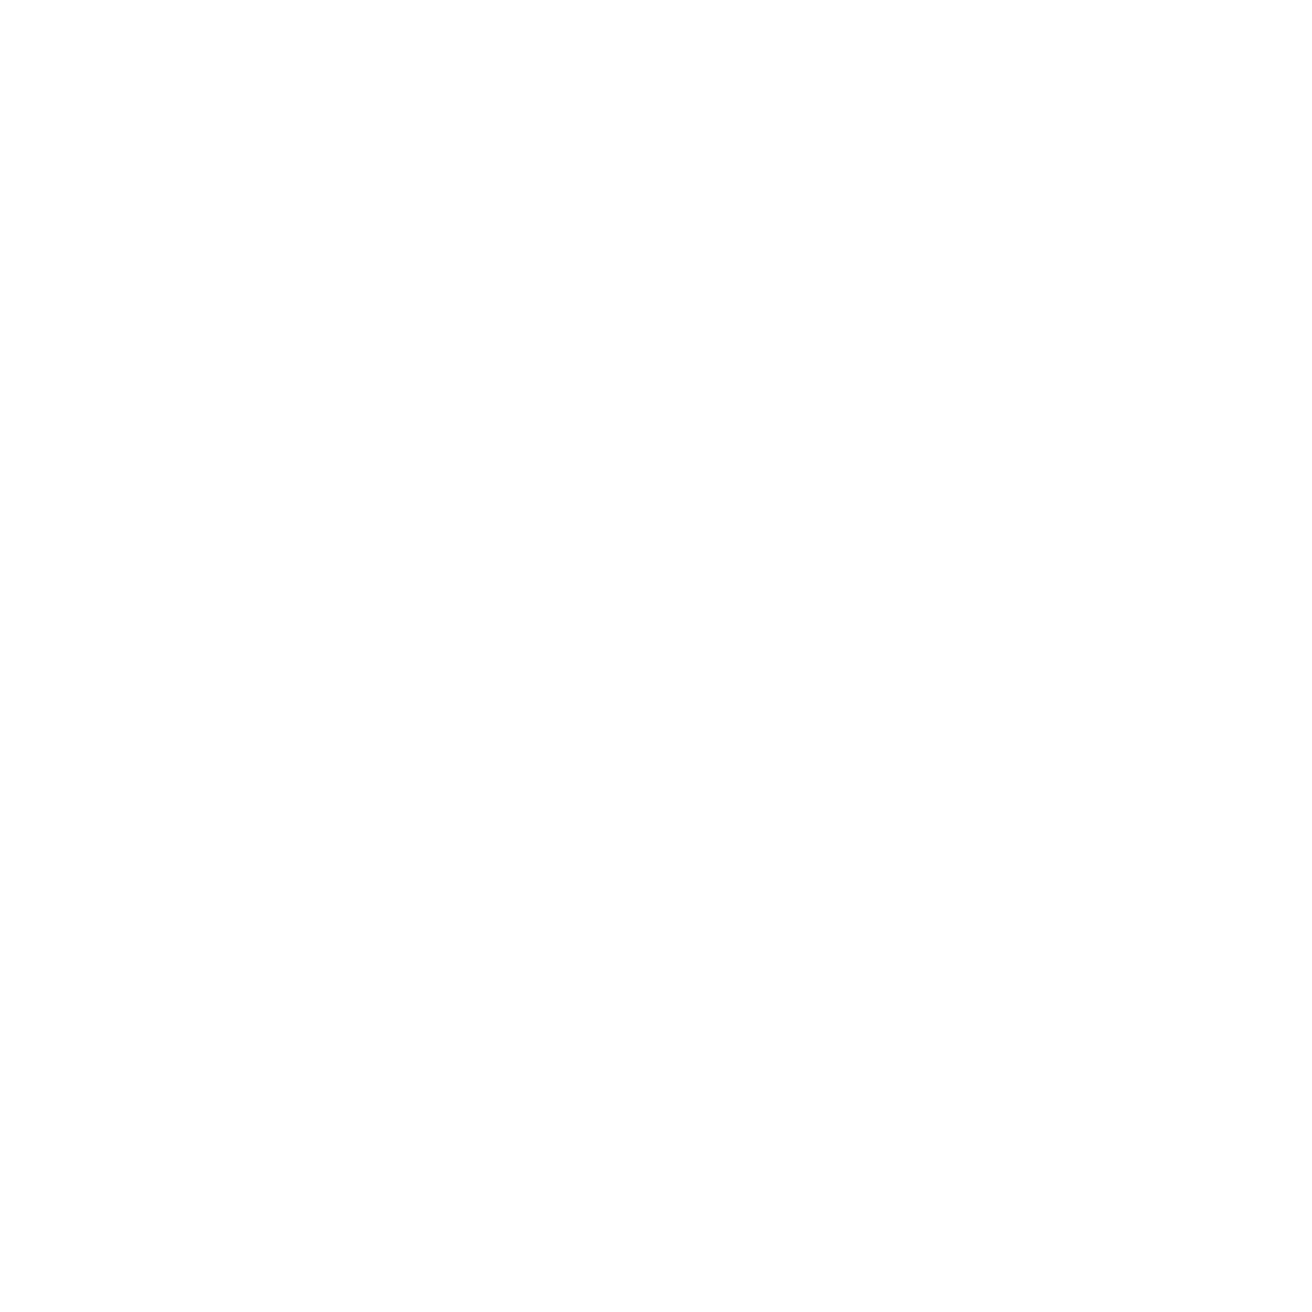

In [8]:

Nbins = 30
plt.rcParams['figure.figsize'] = (10,10)
# plt.rc('xtick', labelsize=7)
# plt.rc('ytick', labelsize=7)

colors = {"left":'red',"middle":'blue',"right":'green'}

fig, [ax1, ax2,ax3] = plt.subplots(3,1)
left_hist = map(int,left_stays["length"].astype('timedelta64[s]'))
middle_hist = map(int,middle_stays["length"].astype('timedelta64[s]'))
right_hist = map(int,right_stays["length"].astype('timedelta64[s]'))

n, bins, patches = ax1.hist(left_hist , bins=Nbins, facecolor='red', alpha=transp, histtype='bar')
plt.suptitle("Urinal",fontsize=15)
n, bins, patches = ax2.hist(middle_hist, bins=Nbins, facecolor='blue', alpha=transp, histtype='bar')
n, bins, patches = ax3.hist(right_hist, bins=Nbins, facecolor='green', alpha=transp, histtype='bar')
# x = sorted_stays["length"][sorted_stays["Position"] == Urinal]
# n, bins, patches = ax.hist(x.astype('timedelta64[s]'), bins=Nbins, facecolor=colors[Urinal], alpha=transp, histtype='bar')
# ax1.set_xticks(bins);

plt.xlabel('Length of Stay (s)',fontsize=15)
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')#,fontdict=font)
fig.text(0.07, 0.75, 'Left', va='center', rotation='vertical')#,fontdict=font)
fig.text(0.07, 0.5, 'Middle', va='center', rotation='vertical')#,fontdict=font)
fig.text(0.07, 0.23, 'Right', va='center', rotation='vertical')#,fontdict=font)

ax1.set_xlim([10,73]); ax1.set_ylim([0,19.5]);
ax2.set_xlim([10,73]); ax2.set_ylim([0,19.5]);
ax3.set_xlim([10,73]); ax3.set_ylim([0,19.5]);
# plt.xticks(rotation=90) 
plt.savefig('Images/tripleHist.png')#, facecolor='white', edgecolor='white')#, transparent=True)

### If we remove the outlier from the middle stay, we see the standard deviation more reliably is about 13 seconds

In [9]:
from datetime import timedelta
middle_stays = middle_stays[middle_stays["length"] < timedelta(seconds=80)]
middle_stay_mean = middle_stays['length'].astype('timedelta64[s]').mean()
middle_stay_std = middle_stays['length'].astype('timedelta64[s]').std()
print("middle - mean: {:0.2f} \tstd: {:0.2f}".format(middle_stay_mean, middle_stay_std))


middle - mean: 30.06 	std: 12.78


## Calculate Stays per Hour
### Extract the hour from every time stamp and add it as it's own column "hour"

In [10]:
sorted_stays["hour"] = sorted_stays["in"].dt.hour
sorted_stays.head(10)

,in,out,in_index,out_index,length,Position,hour
23,2017-11-23 17:05:18,2017-11-23 17:05:52,2509,2814,00:00:34,left,17
28,2017-11-23 17:06:30,2017-11-23 17:07:12,3148,3520,00:00:42,left,17
37,2017-11-23 17:03:22,2017-11-23 17:03:48,1487,1719,00:00:26,right,17
44,2017-11-23 17:04:28,2017-11-23 17:05:15,2073,2486,00:00:47,right,17
69,2017-11-23 17:40:15,2017-11-23 17:40:52,21033,21364,00:00:37,left,17
93,2017-11-23 17:12:43,2017-11-23 17:13:23,6444,6793,00:00:40,right,17
107,2017-11-23 17:03:25,2017-11-23 17:03:49,1511,1725,00:00:24,middle,17
109,2017-11-23 17:35:01,2017-11-23 17:35:46,18262,18660,00:00:45,right,17
118,2017-11-23 17:04:18,2017-11-23 17:05:14,1979,2477,00:00:56,middle,17
138,2017-11-23 17:41:32,2017-11-23 17:41:57,21717,21936,00:00:25,right,17


### Mould and setup data for hourly and transition state dataframes

In [11]:
sorted_ins = sorted_stays.drop(["out","out_index"], axis = 1)
sorted_ins["in_out"] = "in"
sorted_ins = sorted_ins.rename(columns={'in': 'time', 'in_index': 'x'})
sorted_outs = sorted_stays.drop(["in","in_index"], axis = 1)
sorted_outs["in_out"] = "out"
sorted_outs = sorted_outs.rename(columns={'out': 'time', 'out_index': 'x'})
stays = pd.concat([sorted_ins,sorted_outs], axis=0)

stays.sort_values(by=["x"],inplace = True)

hour_df = pd.concat([stays["hour"],stays["in_out"],stays["time"].dt.day], axis = 1)
hour_df = hour_df[hour_df["in_out"] == "in"]
hour_df = hour_df.drop(["in_out"],axis = 1)
hour_df = hour_df.rename(columns={'time': 'day'})

stays.drop(["x","hour"],axis = 1,inplace = True)
hour_df.head()

,hour,day
37,17,23
107,17,23
118,17,23
44,17,23
23,17,23


### Count Stays per hour over all days 

In [12]:
hour_counts = hour_df["hour"].value_counts()

hour_counts = hour_counts.sort_index()
for i in range(24):
    try:
        if hour_counts.index[i] != i:
            hour_counts[i] = 0
            hour_counts.sort_index(inplace=True)
    except IndexError:
        if i == 23:
            hour_counts["23"] = 0

## Plot Urinal Stays per Hour

<IPython.core.display.Javascript object>


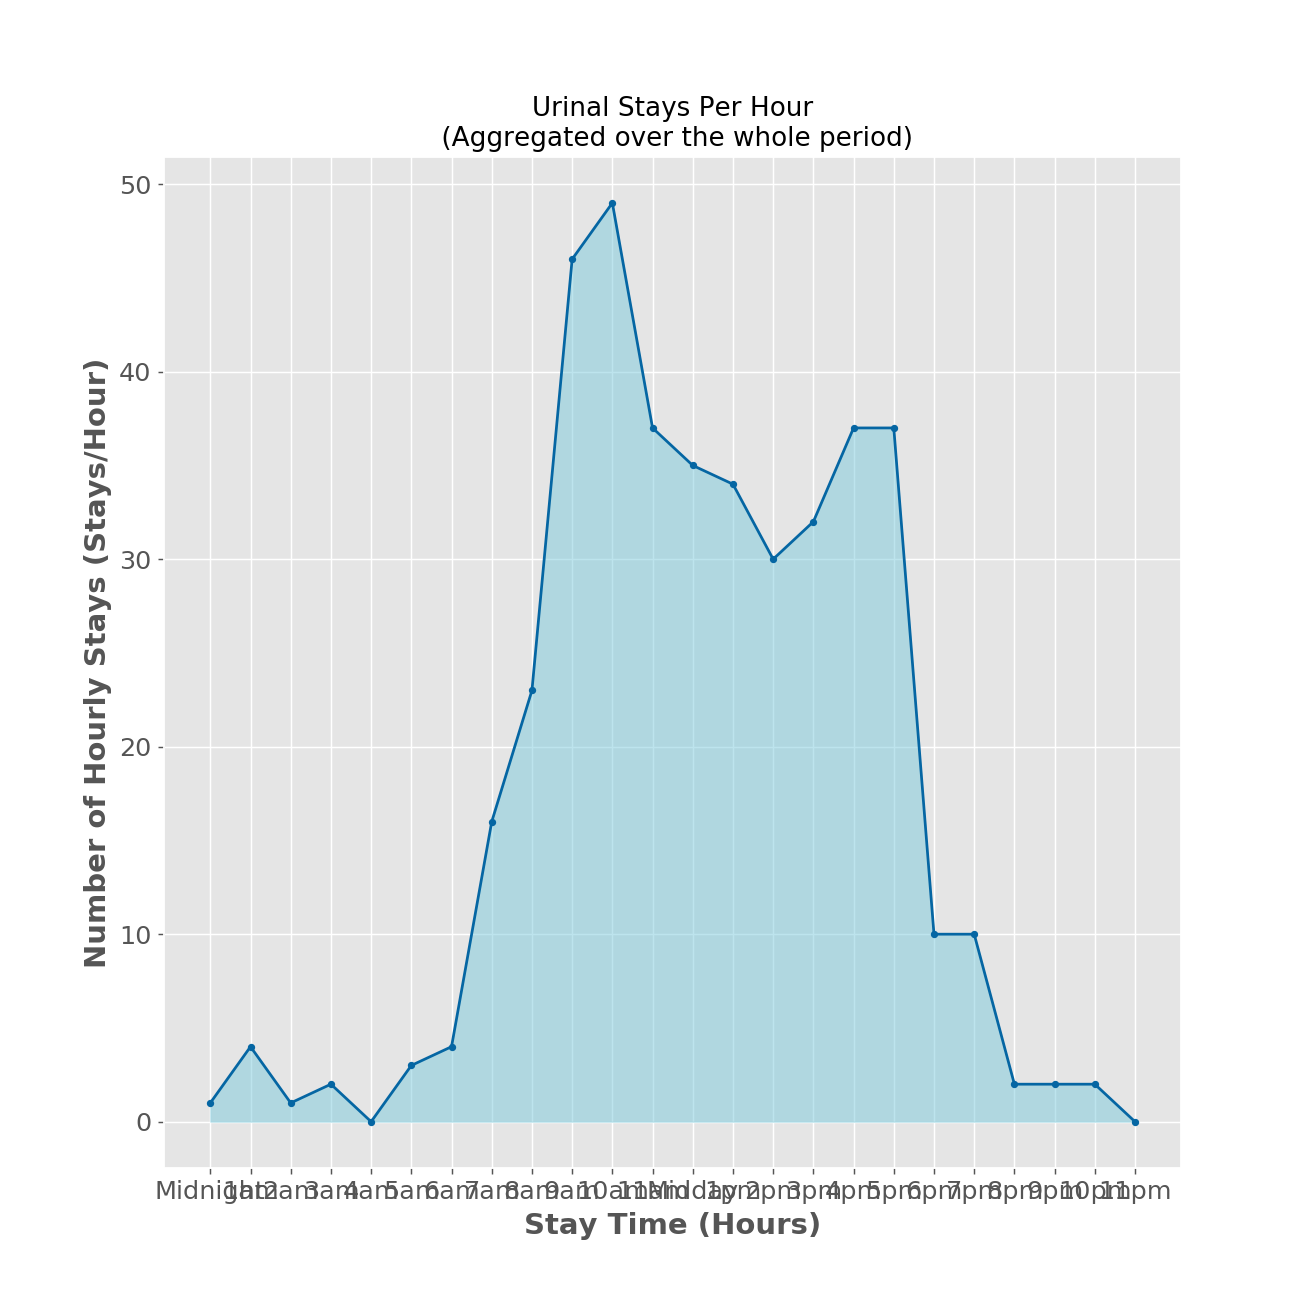

In [13]:
plt.clf()
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (9,6)
stay_times = pd.DataFrame({"Hour Visited":hour_counts})
x = np.arange(0.0, 24, 1)

my_xticks = ["Midnight","1am","2am","3am","4am","5am","6am","7am","8am","9am","10am","11am",
             "Midday"  ,"1pm","2pm","3pm","4pm","5pm","6pm","7pm","8pm","9pm","10pm","11pm"]
plt.xticks(range(24), my_xticks);
plt.plot(x, stay_times, marker='.', lw=1.5, color="#0566A3")
d = np.zeros(len(stay_times))
plt.fill_between(x,stay_times.iloc[:,0],where=stay_times.iloc[:,0]>=d, interpolate=True, color='#7DCADD',alpha=transp)

plt.xlabel('Stay Time (Hours)');
plt.ylabel('Number of Hourly Stays (Stays/Hour)');
plt.title('Urinal Stays Per Hour\n (Aggregated over the whole period)');
fig.savefig('Images//Stays_per_Hour_agg.png')

### create a counts column

In [14]:
hour_df["counts"] = 1
hour_df.sample(5)

,hour,day,counts
6250,13,25,1
1877,12,24,1
1936,13,24,1
1751,11,24,1
2965,11,27,1


### count stays per hour per day

In [15]:
adj_check = (hour_df.hour != hour_df.hour.shift()).cumsum()
hour_sums = hour_df.groupby(['day','hour', adj_check], as_index=False, sort=False)['counts'].sum()
hour_sums.sample(5)


,day,hour,counts
25,25,8,3
41,27,17,11
12,24,12,14
8,24,8,7
33,27,9,23


### Add hours where no stays occured to each day

In [16]:
def find_missing_items(int_list,day):
    # Put the list in a set, find smallest and largest items
    original_set  = set(int_list)
    smallest_item = 0
    largest_item = 23
    if hour_sums["day"].iloc[-1] == day:
        largest_item  = max(original_set)
    elif hour_sums["day"].iloc[0] == day:
        smallest_item = min(original_set)

    # Create a super set of all items from smallest to largest
    full_set = set(xrange(smallest_item, largest_item + 1))

    # Missing items are the ones that are in the full_set, but not in
    # the original_set
    return sorted(list(full_set - original_set))

first_day =  hour_sums["day"].iloc[0]
last_day = hour_sums["day"].iloc[-1]
for day in range(first_day,last_day+1):
    if day == first_day:
        temp = pd.DataFrame({"day":day,"hour":find_missing_items(hour_sums["hour"][hour_sums["day"] == day],day),"counts":0})
        temp = temp.reindex(columns=["day","hour","counts"])
        hour_sums_inserted = pd.concat([hour_sums[hour_sums["day"] == day],temp],axis=0).sort_values(by="hour")        
        continue
        
    temp = pd.DataFrame({"day":day,"hour":find_missing_items(hour_sums["hour"][hour_sums["day"] == day],day),"counts":0})
    temp = temp.reindex(columns=["day","hour","counts"])
    
    currDay = pd.concat([hour_sums[hour_sums["day"] == day],temp],axis=0).sort_values(by="hour")
    
    hour_sums_inserted = pd.concat([hour_sums_inserted, currDay])
    prevDay = currDay


hour_sums = hour_sums_inserted
hour_sums.sample(5)

,day,hour,counts
5,27,6,0
22,25,5,1
12,25,20,0
2,27,2,0
33,27,9,23


## Plot Stays Per Hour Per Day

<IPython.core.display.Javascript object>


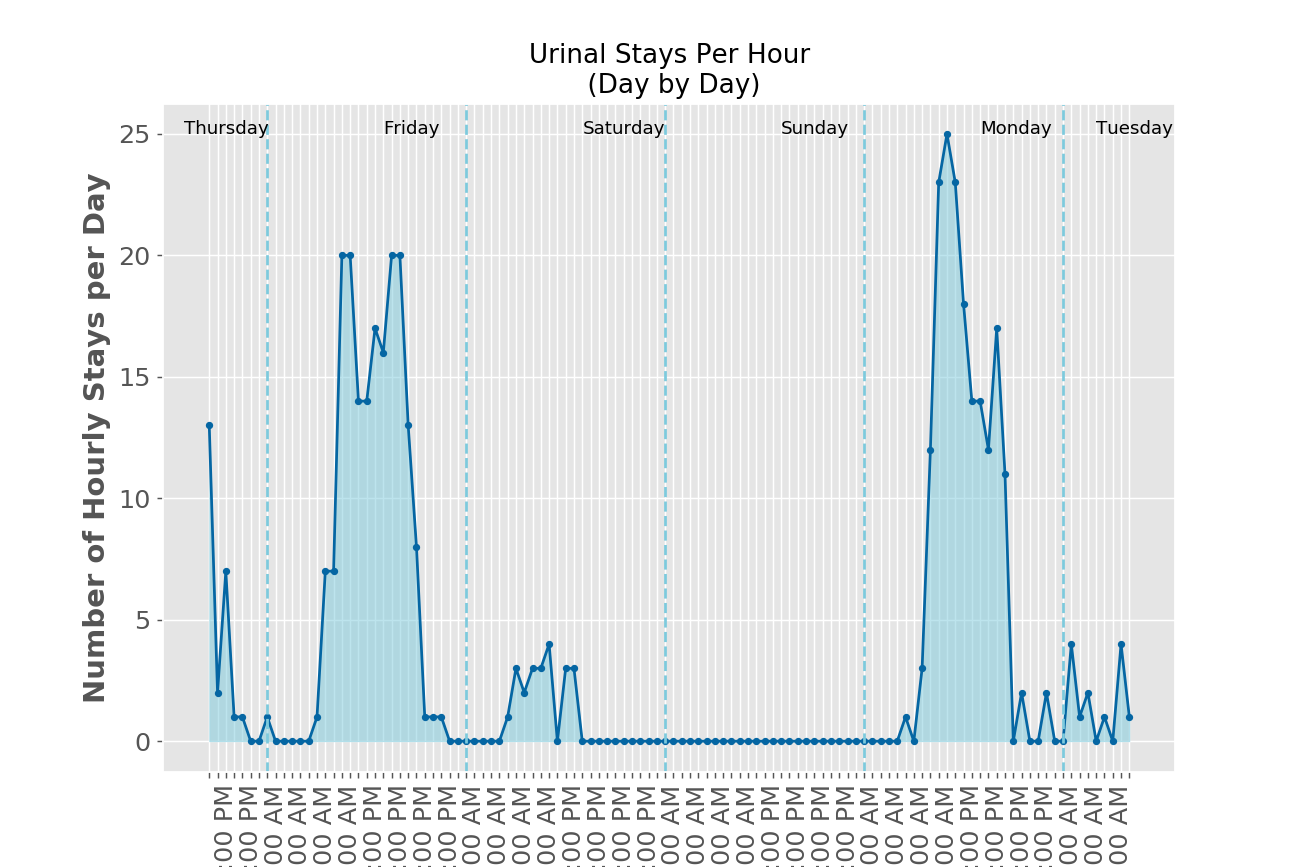

In [17]:

# Set plot parameters
plt.rcParams['figure.figsize'] = (10,6)
# plt.rc('xtick', labelsize=8)
# plt.rc('ytick', labelsize=12)

# extract data to plot
num_times = pd.DataFrame({"Num Stays":hour_sums["counts"]})
x = np.arange(0.0, len(num_times), 1)

# function to convert hours and days to readable text
from datetime import datetime
def hourint_to_12hour(hour):
    return datetime.strptime(str(int(hour))+":00", "%H:%M").strftime("%I:%M %p")

def dayint_to_12hour(hour):
    return datetime.strptime("11 "+str(hour), "%m %d").strftime("%A")

### ------------------ ###
# major data plotting
fig, ax1 = plt.subplots()

xlabels = hour_sums["hour"].apply(hourint_to_12hour)
ax1.set_xticks(range(0,len(hour_sums["hour"])));
ax1.set_xticklabels(xlabels,rotation=90)
ax1.plot(x, num_times, marker='.', lw=1.5, color="#0566A3")
### ------------------ ###    


#fill in line plot
d = np.zeros(len(num_times))
ax1.fill_between(x,num_times.iloc[:,0],where=num_times.iloc[:,0]>=d, interpolate=True, color='#7DCADD',alpha=transp)

#Hide every second and third xlabel
for label in ax1.xaxis.get_ticklabels()[::3]:
    label.set_visible(False)
for label in ax1.xaxis.get_ticklabels()[1::3]:
    label.set_visible(False)


# Label days of the week on plot
start = 7
days = [dayint_to_12hour(x) for x in range(first_day-1,last_day+1)]
for i in range(0,5):
    
    ax1.axvline(start+24*i,ls="--",color="#7DCADD")
    ax1.annotate(str(days[i]),xy=(start+24*i-10,max(hour_sums["counts"]))
                 ,color="black")#,size=10)
i = 5
ax1.annotate(str(days[i]),xy=(start+24*i-20,max(hour_sums["counts"]))
             ,color="black")#,size=10)

#Label Axis
ax1.set_xlabel('Stay Time (Hour)');
ax1.set_ylabel('Number of Hourly Stays per Day');
ax1.set_title('Urinal Stays Per Hour\n (Day by Day)');
fig.savefig('Images/Stays_per_Hour_day.png')

## Extrapolate state changes
In order to see behaviour we find overlapping stays at a given urinal.  
We do this by looking at state changes.     
I.e. while a person is at the left Urinal, a second person starts using the right Urinal   
the state change would be (👨⚪⚪ -> 👨⚪👨)

## All Possible State Changes
We assume that only one person can walk in and out at a time.  
given a sampling rate of 10 Hz this is a pretty safe bet.  
We also ignore a "change" where the state remains the same
(this is covered by stay times).

We represent the empty urinal by __0__, and a person by __1__.  
So a state change from 1 person at the left Urinal to the empty state:  
        _100 &rarr; 000 = b100000_


In [18]:
#----- empty to 1 person changes---
states_dec = [
int('100000',2), int('010000',2), int('001000',2),
int('000100',2), int('000010',2), int('000001',2),

#----- 1 person to 2 changes---
int('100110',2), int('100101',2), int('110100',2), 
int('101100',2), int('010110',2), int('010011',2),
int('110010',2), int('011010',2), int('001011',2),
int('001101',2), int('011001',2), int('101001',2),

#----- 2 person to 3 changes---
int('011111',2), int('101111',2), int('110111',2),
int('111011',2), int('111101',2), int('111110',2)]

states_bin = [bin(states_dec[i])[2:].zfill(6) for i in range(len(states_dec))]

### We iterate over the stays dataframe, which was defined previously

In [19]:
stays.sample(5)

,time,length,Position,in_out
13488,2017-11-27 10:27:39,00:00:59,right,in
13596,2017-11-27 10:54:17,00:00:42,right,in
13606,2017-11-27 11:01:56,00:00:51,right,in
3683,2017-11-24 13:44:30,00:00:24,middle,out
1952,2017-11-24 13:57:14,00:00:36,right,out


## Count All State Changes
We use bitwise _and_ and _or_ to extrapolate all state changes.
This simply adds a 1 in the position if they are entering  
or adds a 0 if they are leaving

In [20]:
state_changes_df = pd.DataFrame({"Count":np.zeros(len(states_bin)),"State Change":states_bin})
state_changes_df = state_changes_df.set_index("State Change")

curr_state = "000"
prev_state = "000"
state_change = None
for row in stays.iterrows():
    
    # Deteremine the current state
    pos = row[1]["Position"]
    inout = row[1]["in_out"]
    
    #LIN
    if pos == "left" and inout=="in":
        curr_state = int(prev_state,2) | int("100",2)
    # LOUT
    if pos == "left" and inout == "out":
        curr_state = int(prev_state,2) & int("011",2)
    # MIN
    if pos == "middle" and inout =="in":
        curr_state = int(prev_state,2) | int("010",2)
    # MOUT
    if pos == "middle" and inout == "out":
        curr_state = int(prev_state,2) & int("101",2)
    # RIN
    if pos == "right" and inout =="in":
        curr_state = int(prev_state,2) | int("001",2)
    # ROUT
    if pos == "right" and inout == "out":
        curr_state = int(prev_state,2) & int("110",2) 
    
    # Get State Change
    state_change = prev_state + bin(curr_state)[2:].zfill(3)
    state_changes_df.loc[state_change] = state_changes_df.loc[state_change]+1
    prev_state = bin(curr_state)[2:].zfill(3)


In [21]:
state_changes_df.T

State Change,100000,010000,001000,000100,000010,000001,100110,100101,110100,101100,...,001011,001101,011001,101001,011111,101111,110111,111011,111101,111110
Count,173.0,51.0,146.0,171.0,51.0,148.0,1.0,16.0,1.0,18.0,...,3.0,23.0,3.0,21.0,1.0,0.0,0.0,0.0,0.0,1.0


## Build a Transistion Matrix

In [35]:
def color_zero_red(val):
    color = 'red' if val <= 0.0 else 'black'
    return 'color: %s' % color

# all states
tri_states = ["000","100","010","001","110","011","101","111"]
# build an empty 8x8 transition matrix
trans_matrix = pd.DataFrame(0.0, index=tri_states, columns=tri_states)

for i in range(len(state_changes_df)):
    state1 = state_changes_df.iloc[i].name[0:3]
    state2 = state_changes_df.iloc[i].name[3:6]
    trans_matrix[state2][state1] = float(state_changes_df.iloc[i][0])

s = trans_matrix.T.style.applymap(color_zero_red)
s

,000,100,010,001,110,011,101,111
000,0,173,51,146,0,0,0,0
100,171,0,0,0,1,0,18,0
010,51,0,0,0,2,1,0,0
001,148,0,0,0,0,3,21,0
110,0,1,1,0,0,0,0,1
011,0,0,2,3,0,0,0,0
101,0,16,0,23,0,0,0,0
111,0,0,0,0,0,1,0,0


## Convert the Transition Matrix to Row Probabilities
We take the starting state from the vertical column (From), and then the probability of it changing to the state along the top (To) is at the intersection.  

For example the probablity of a person visiting the right spot (⚪⚪👨) to leave without someone else coming to do their business (a now empty Urinal) is 90% or 0.9  
             $$\Pr(⚪⚪👨\rightarrow⚪⚪⚪) = 90\% $$
Each row adds up to 100% (so for the right column):  
``` python
0.9 + 0.01 + 0.09 = 1
```

In [36]:
sum_rows = trans_matrix.sum(axis=0).astype(np.float64)
for index, row_sum in enumerate(sum_rows):
    for col in range(trans_matrix.shape[0]):
        trans_matrix[tri_states[index]][tri_states[col]] = 100*((trans_matrix[tri_states[index]][tri_states[col]].astype(np.float64) / float(row_sum)).round(5))

trans_matrix = trans_matrix.T

In [37]:
import seaborn as sns
cm = sns.light_palette("#5fba7d", as_cmap=True)
trans_matrix.style.background_gradient(cmap=cm).applymap(color_zero_red)

,000,100,010,001,110,011,101,111
000,0,46.757,13.784,39.459,0,0,0,0
100,90,0,0,0,0.526,0,9.474,0
010,94.444,0,0,0,3.704,1.852,0,0
001,86.047,0,0,0,0,1.744,12.209,0
110,0,33.333,33.333,0,0,0,0,33.333
011,0,0,40,60,0,0,0,0
101,0,41.026,0,58.974,0,0,0,0
111,0,0,0,0,0,100,0,0


## Visualise the Transition matrix as a State Diagram

In [25]:
import math
col_types = {"to":str, "000":float, "100":float, "010":float, "001":float, "110":float, "011":float,"101":float, "111":float}
# probs = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jIAa09SCol2bspNN5ZKL3qw4LpUc4i66YNPMOeYWYI_T9v_aMSVKTD0ydRJIcJm70xJC7ISDNuI-/pub?gid=0&single=true&output=csv",
#                     dtype=col_types,
#                     index_col=0)

probs = trans_matrix
# probs
head = """
digraph G {
  graph [overlap=false outputorder=edgesfirst];
  node [style=filled fillcolor=white];
  #edge [color="#57adf9b8", arrowsize=0.5];
  edge [color="#c6dbef:#9ecae1:#6baed6:#4292c6:#2171b5:#08519c:#08306b;0.25", arrowsize=0.5];
  000 [label="⚪⚪⚪"];
  001 [label="⚪⚪👨"];
  010 [label="⚪👨⚪"];
  011 [label="⚪👨👨"];
  100 [label="👨⚪⚪"];
  101 [label="👨⚪👨"];
  110 [label="👨👨⚪"];
  111 [label="👨👨👨"];
"""
tail = "}"
dot_data = ""
for index, row in probs.iterrows():
    count = 0
    for item in row:
        if item != 0:
#             print("{}->{}".format(index,probs.columns[count]))
            edge_data = '  {start} -> {to} [label="{pc:.2%}", penwidth={width}];\n'.format(start=index,
                                                                                       to=probs.columns[count],
                                                                                       pc=item,
                                                                                       width=math.ceil(item*10))
            dot_data += edge_data
        count+=1
print(head)
print(dot_data)
print(tail)

dot = head+dot_data+tail
G = open('dotgraph.gv','w')
G.write(dot)
G.close()


digraph G {
  graph [overlap=false outputorder=edgesfirst];
  node [style=filled fillcolor=white];
  #edge [color="#57adf9b8", arrowsize=0.5];
  edge [color="#c6dbef:#9ecae1:#6baed6:#4292c6:#2171b5:#08519c:#08306b;0.25", arrowsize=0.5];
  000 [label="⚪⚪⚪"];
  001 [label="⚪⚪👨"];
  010 [label="⚪👨⚪"];
  011 [label="⚪👨👨"];
  100 [label="👨⚪⚪"];
  101 [label="👨⚪👨"];
  110 [label="👨👨⚪"];
  111 [label="👨👨👨"];

  000 -> 100 [label="47.00%", penwidth=5.0];
  000 -> 010 [label="14.00%", penwidth=2.0];
  000 -> 001 [label="39.00%", penwidth=4.0];
  100 -> 000 [label="90.00%", penwidth=9.0];
  100 -> 110 [label="1.00%", penwidth=1.0];
  100 -> 101 [label="9.00%", penwidth=1.0];
  010 -> 000 [label="94.00%", penwidth=10.0];
  010 -> 110 [label="4.00%", penwidth=1.0];
  010 -> 011 [label="2.00%", penwidth=1.0];
  001 -> 000 [label="86.00%", penwidth=9.0];
  001 -> 011 [label="2.00%", penwidth=1.0];
  001 -> 101 [label="12.00%", penwidth=2.0];
  110 -> 100 [label="33.00%", penwidth=4.0];
  110 -> 010

If the graph doesn't render for you, copy the printed string above directly into [this online tool](https://dreampuf.github.io/GraphvizOnline/)

In [26]:
from graphviz import render, Digraph
from IPython.display import SVG, display
g = Digraph('G', filename='Images/dotgraph.gv', format='svg')

test_SVG =g.pipe().decode('utf-8')
display(SVG(test_SVG))
SVG(test_SVG)

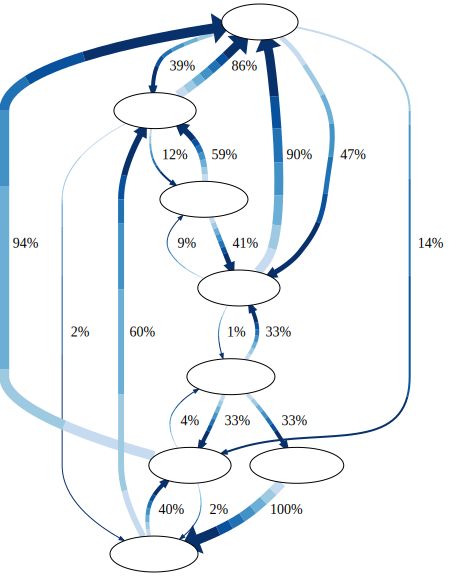

In [27]:
display(SVG('Images/dot-graph.svg'))